# LV03- Distortion
- Hard Clipper
- tanh
- cubic
- polynomial
- tube

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
from IPython.display import Audio

In [3]:
T = 5 #sec
sr = 44100 #Hz
N = T*sr #samples
n = np.arange(N)
t = n/sr

In [4]:
f = 5000
x =np.sin(t*f*np.pi*2)

In [5]:
def distAnalysisPlot(x,y):
    plt.figure(figsize=[18,4])
    plt.subplot(121)
    plt.specgram(y,Fs=sr)
    plt.colorbar()
    plt.subplot(122)
    plt.plot(x[1000:20000], label='input')
    plt.plot(y[1000:20000], label='output')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# plt.figure(figsize=[17,6])
# plt.plot(t,x)
# plt.grid()
# plt.show()

In [7]:
sweep = sig.chirp(t,10,T,22050, method='logarithmic')
xin = np.linspace(-1,1,1000)

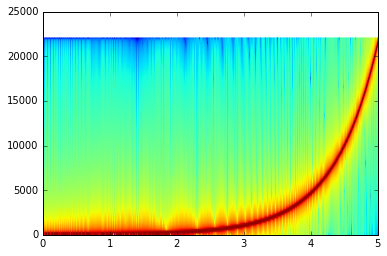

In [8]:
plt.specgram(sweep,Fs=sr)
plt.show()

## Hard Clipper
### Pros: 
- Very simple

### Cons:
 - Sounds 'bad'
 - a lot of aliasing
 - very unnatural, since distorton comes in suddenly, not gradually

$\displaystyle f(x) = \left\{\begin{array}{ll}
-1, & x\leq -1 \\ 
x, & -1 \leq x \leq 1 \\ 
1, & x\geq 1 \\
\end{array}\right.
$

In [9]:
def hardClip(x,preAmp):
    return np.clip(x*preAmp,-1,1)

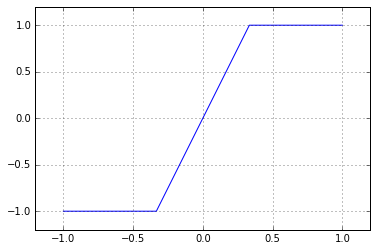

In [10]:
plt.plot(xin,hardClip(xin,3))
plt.grid()
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

In [11]:
hardOut = hardClip(sweep,1.2)

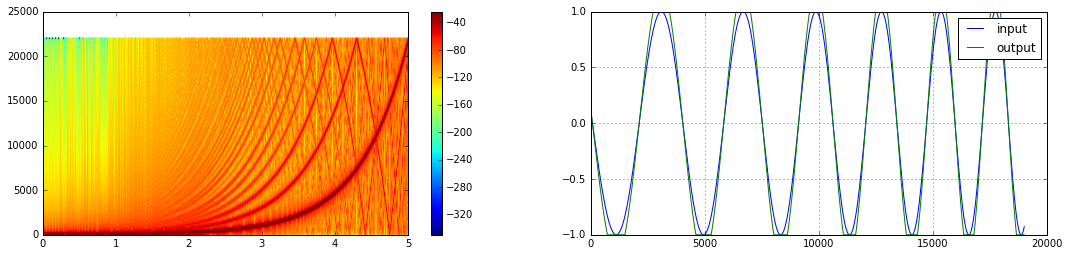

In [12]:
distAnalysisPlot(sweep,hardOut)

In [13]:
Audio(data=hardOut,rate=sr)

## Tangens Hyperbolicus distortion

### Pros: 
- Very simple
- tanh is nearly in every math package in any language
- gradual distortion. Low input levels have little distortion, high levels have much distortion

### Cons:
 - Aliases if not treatet correctly
 - a bit simple and overused
 
 
 $f(x) = tanh(x)$
 
 where
 
${\displaystyle \tanh x={\frac {\sinh x}{\cosh x}}={\frac {\mathrm {e} ^{x}-\mathrm {e} ^{-x}}{\mathrm {e} ^{x}+\mathrm {e} ^{-x}}}={\frac {\mathrm {e} ^{2x}-1}{\mathrm {e} ^{2x}+1}}=1-{\frac {2}{\mathrm {e} ^{2x}+1}}}$


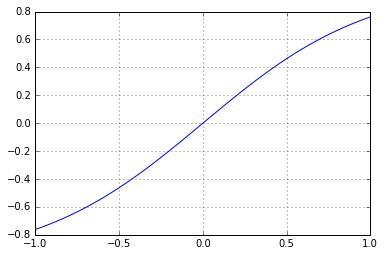

In [14]:
xin = np.linspace(-1,1)
plt.plot(xin,np.tanh(xin))
plt.grid()
plt.show()

In [15]:
tsweep = np.tanh(sweep)

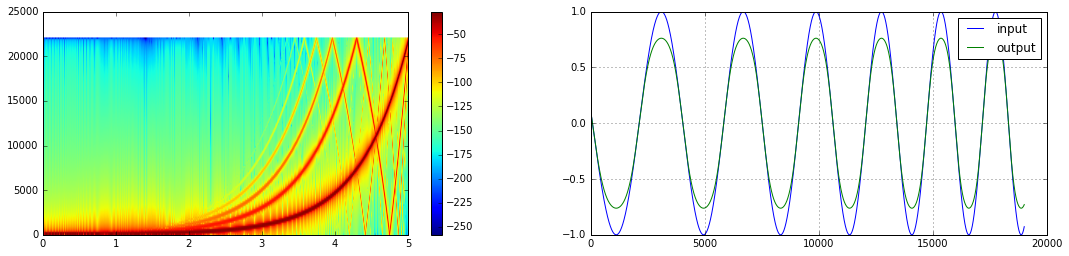

In [16]:
distAnalysisPlot(sweep,tsweep)

## Cubic Distortion

### Pros: 
- pretty simple
- gradual distortion. Low input levels have little distortion, high levels have much distortion
- Minimal danger of aliasing, but aliasing is still present

### Cons:
 - Aliases if not treates correctly
 - a bit simple and overused

$\displaystyle f(x) = \left\{\begin{array}{ll}
-\frac{2}{3}, & x\leq -1 \\ 
x-\frac{x^3}{3}, & -1 \leq x \leq 1 \\ 
\frac{2}{3}, & x\geq 1 \\
\end{array}\right.
$

In [17]:
def cubicDist(x):
    under = x<= -1
    over = x>=1
    y = x-(x**3)/3
    y[under] = -2/3
    y[over] = 2/3
    return y

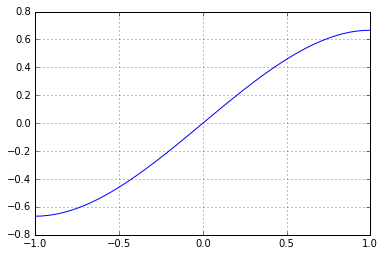

In [18]:
plt.plot(xin,cubicDist(xin))
plt.grid()
plt.show()

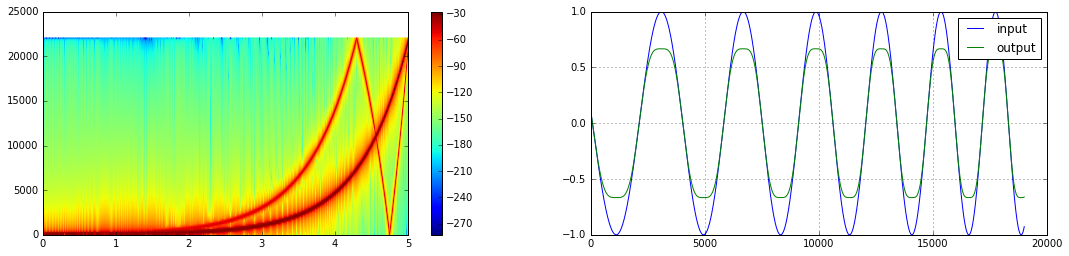

In [19]:
distAnalysisPlot(sweep,cubicDist(sweep))

## Arbitrary Polynomial
### Pros: 
- Very customizeable
- number of polynomial order = number of overtones

### Cons:
 - hard to control
 - Can alias a lot and can produce weird results in general
 
$f(x) = a_0 + a_1x + a_2x^2 + ... + a_nx^n$

In [54]:
a = np.polynomial.Polynomial([0,0.9,0.1,-0.1,0.1,-0.1, 0.3, 0.1]) #theses are the a coefficents in the formula above!

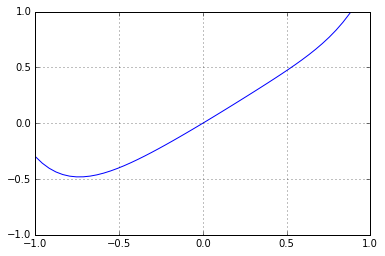

In [21]:
xin = np.linspace(-1,1)
plt.plot(xin,a(xin))
plt.grid()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

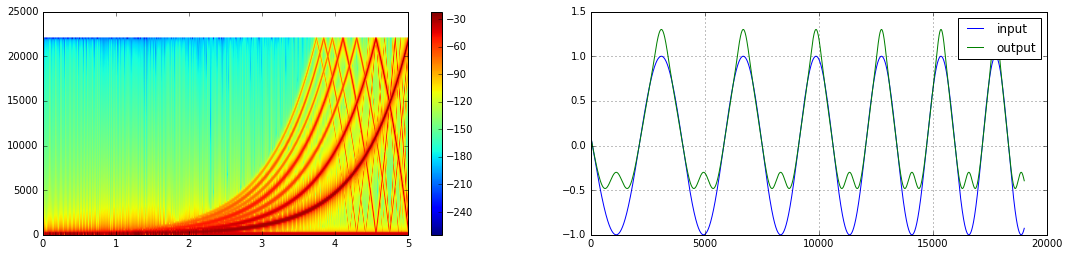

In [22]:
distAnalysisPlot(sweep, a(sweep))

## Valve/Tube Simulation Distortion

### Pros: 
- Can sound good
- Lots of different configurations
- gradual distortion. Low input levels have little distortion, high levels have much distortion

### Cons:
 - Not easy to implement (we actually need an additional low-pass for this to be correct)
 - Not easy to understand
 - hard to control (many different functions etc.)
 - Aliasing


### Use downloaded script to get transfer functions

In [23]:
import tube_transfer_py3
tube_transfer_py3.tubes.keys()

dict_keys(['12AX7', '12AX7A', '12AX7ASYL', '12AT7', '12AU7', '12AY7', '12AZ7', '12BH7A', '6AN8T', '6DJ8', '6C16', '7025', 'SV6N1P', 'ECL80T', 'ECL81T', 'ECL83T', 'ECC83', 'ECC81', 'JJECC81', 'JJECC82', 'JJECC83S', 'JJECC99', 'JJEL34', 'JJKT88', 'JJ6L6GC', '6550', '6AN8P', '6L6CG', '6L6GB', '6AB8', '6BQ5', '7199P', 'KT88', 'KT66', 'EL34_o', 'EL34', 'EL84', 'SVEL34', 'SV6L6GC', 'EF80', 'EF83'])

In [24]:
c = tube_transfer_py3.Circuit('12AX7','triode') # make a circuit object representing a tube

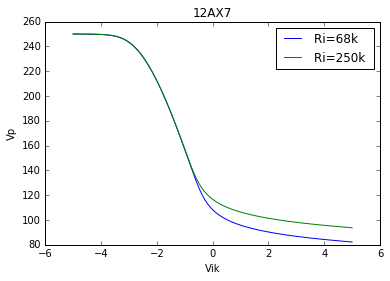

In [25]:
c.plot_Ftube()

### Choose a value for the resistor and plot the function

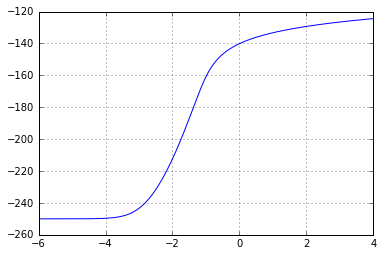

In [26]:
inV = np.linspace(-6,4,1000)
outV = c.FtubeV(inV, 68*10e4)

plt.plot(inV,outV*-1)
plt.grid()
plt.show()

In [44]:
from scipy.interpolate import CubicSpline

In [45]:
cub = CubicSpline(inV, outV) # make a cubic spline interpolator from the values

### Check if the interpolation works
The plots are identical, a good sign the interpolation works.

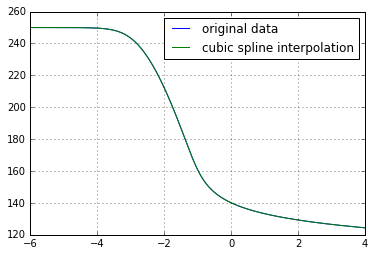

In [46]:
plt.plot(inV, outV, label='original data')
plt.plot(inV, cub(inV), label='cubic spline interpolation')
plt.legend()
plt.grid()
plt.show()

## Play around to normalize our function
We want the x axis and y axis range from -1 to 1

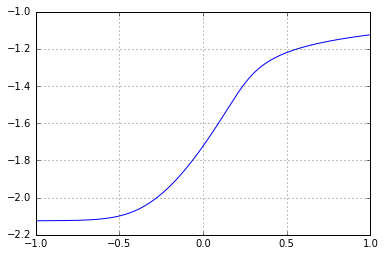

In [47]:
normIn = np.linspace(-1,1,1000)
scaled = normIn*3-1.8
preOut=cub(scaled)
maxOut = max(preOut)
minOut=min(preOut)
p2p=minOut-maxOut
scaleFact=1/p2p


plt.plot(normIn,cub(scaled)*scaleFact)
plt.grid()
plt.show()

### Make a function out of our re-ranged transfer function 

In [48]:
def tubeNorm(x,cub):
    normIn = np.linspace(-1,1,10)
    scaled = normIn*3-1.8
    preOut=cub(scaled)
    maxOut = max(preOut)
    minOut=min(preOut)
    p2p=minOut-maxOut
    scaleFact=1/p2p
    dc = np.mean(preOut*scaleFact)
    return (cub(x*3-1.8)*scaleFact)-dc

    

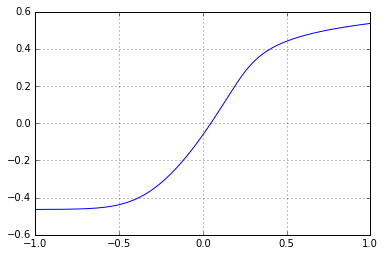

In [49]:
plt.plot(normIn,tubeNorm(normIn,cub))
plt.grid()
plt.show()

### Test the tube distortion with a sweep

In [34]:
ytub = tubeNorm(sweep,cub)

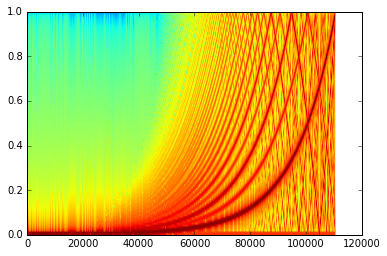

In [35]:
plt.specgram(ytub)
plt.show()

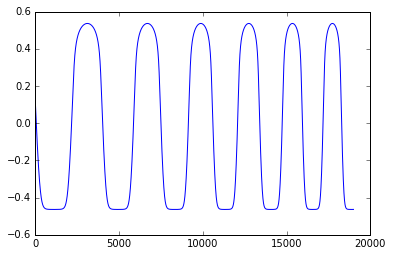

In [36]:
plt.plot(ytub[1000:20000])
plt.show()

In [37]:
Audio(data= ytub,rate=sr)

## Up-Sampling to Avoid Aliasing

In [38]:
def tubeNormResa(x,cub,resamplingFact):
    
    x = sig.resample(x,len(x)*resamplingFact) #upsampling
    
    normIn = np.linspace(-1,1,10)
    scaled = normIn*3-1.8
    preOut=cub(scaled)
    maxOut = max(preOut)
    minOut=min(preOut)
    p2p=minOut-maxOut
    scaleFact=1/p2p
    dc = np.mean(preOut*scaleFact)
    
    result = (cub(x*3-1.8)*scaleFact)-dc

    final = sig.decimate(result,resamplingFact,zero_phase=True) 
    
    return final

In [39]:
ytubUS = tubeNormResa(sweep,cub,16)

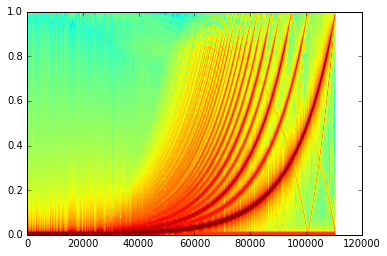

In [40]:
plt.specgram(ytubUS)
plt.show()

In [41]:
Audio(data= ytubUS,rate=sr)

- Verify that aliasing can be heard and sounds bad before working to get rid of it.
- Aliasing (bandwidth expansion) is reduced by smoothing "corners" in the nonlinearity.
- Consider an oversampling factor for nonlinear subsystems sufficient to accommodate the bandwidth expansion caused by the nonlinearity.
- Make sure there is adequate lowpass filtering in a feedback loop containing a nonlinearity.


More generally, for an $ N$ th-order nonlinearity, oversampling by $ N/2$ suffices to keep aliasing out of the passband. This is a reasonable choice when the passband is the full audio band, or (using a bit more oversampling) when the lowpass filter is high order.
https://ccrma.stanford.edu/~jos/pasp/Practical_Advice.html

# Misc additions

Making our own `plt.specgram()`

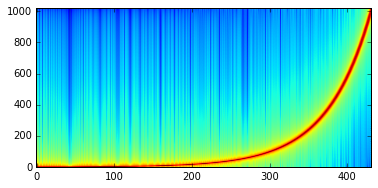

In [51]:
import librosa
spec = librosa.stft(sweep)
s = 20*np.log10((abs(spec)))

plt.imshow(X=s,origin=[0,0], aspect=0.2)
plt.show()

Making an average spectrum display

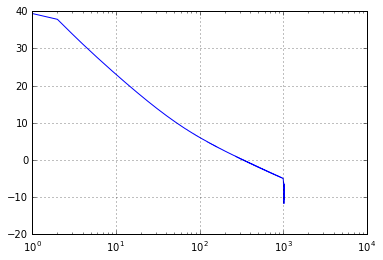

In [53]:
plt.semilogx(20*np.log10(np.mean(abs(spec), axis=1)))
plt.grid()
plt.show()